# The `contact` collection

In [ ]:
import pandas as pd
from pandas import DataFrame

import pymongo
from pymongo import MongoClient

### First we have to connect to the `school` database.

In [ ]:
mongo_uri = 'mongodb://localhost:27017/'

client = MongoClient(mongo_uri);
client

In [ ]:
school_db = client.school
school_db

## Create the `contact` collection.
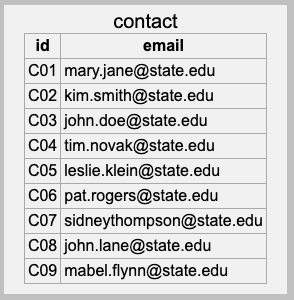

In [ ]:
school_db.contact.drop()

In [ ]:
contact_coll = school_db.contact
contact_coll

## Insert one document.

In [ ]:
contact_coll.insert_one(
    { 'contact_id': 'C01', 'email': 'mary.jane@state.edu' }
)

## Query for the document.
#### Field `_id` is an internal MongoDB document identifier.

In [ ]:
first_contact = contact_coll.find_one()
first_contact

## Only return the `email` field.

In [ ]:
first_contact['email']

## The document's keys.

In [ ]:
first_contact.keys()

## Insert the remaining documents.

In [ ]:
contact_coll.insert_many(
    [ { 'contact_id': 'C02', 'email': 'kim.smith@state.edu' },
      { 'contact_id': 'C03', 'email': 'john.doe@state.edu' },
      { 'contact_id': 'C04', 'email': 'tim.novak@state.edu' },
      { 'contact_id': 'C05', 'email': 'leslie.klein@state.edu' },
      { 'contact_id': 'C06', 'email': 'pat.rogers@state.edu' },
      { 'contact_id': 'C07', 'email': 'signey.thompson@state.edu' },
      { 'contact_id': 'C08', 'email': 'john.lane@state.edu' },
      { 'contact_id': 'C09', 'email': 'mabel.flynn@state.edu' }
    ]
)

## Find all the contacts.

In [ ]:
all_contacts = contact_coll.find()
DataFrame(all_contacts)

## Sort by the `email` field.

In [ ]:
sorted_contacts = contact_coll.find().sort('email')
DataFrame(sorted_contacts)

## Find the document with a given `contact_id`.

In [ ]:
a_contact = contact_coll.find( {'contact_id': 'C07'} )
DataFrame(a_contact)

## Find the students' `contact` documents<br>(`contact_id <= 'C05'`).

In [ ]:
student_contacts = contact_coll.find( {'contact_id': {'$lte': 'C05'}} )
DataFrame(student_contacts)

## Same query but this time don't show the internal `_id` field: `{'_id': 0}`

In [ ]:
student_contacts = contact_coll.find( {'contact_id': {'$lte': 'C05'}},
                                      {'_id': 0} )
DataFrame(student_contacts)

## What do we have so far?

In [ ]:
client.list_database_names()

In [ ]:
school_db.list_collection_names()

In [ ]:
client.close()

#### (c) 2023 by Ronald Mak